Loss at iteration 0: w=[-0.1  0.1], train loss=0.6931471805599452, gradiant train loss=[ 1. -1.]
Loss at iteration 1: w=[-0.2  0.2], train loss=0.5981388693815918, gradiant train loss=[ 1. -1.]
Loss at iteration 2: w=[-0.3  0.3], train loss=0.5130152523999525, gradiant train loss=[ 1. -1.]
Loss at iteration 3: w=[-0.4  0.4], train loss=0.4374879504858856, gradiant train loss=[ 1. -1.]
Loss at iteration 4: w=[-0.5  0.5], train loss=0.3711006659477777, gradiant train loss=[ 1. -1.]
Loss at iteration 5: w=[-0.5  0.5], train loss=0.31326168751822286, gradiant train loss=0.0


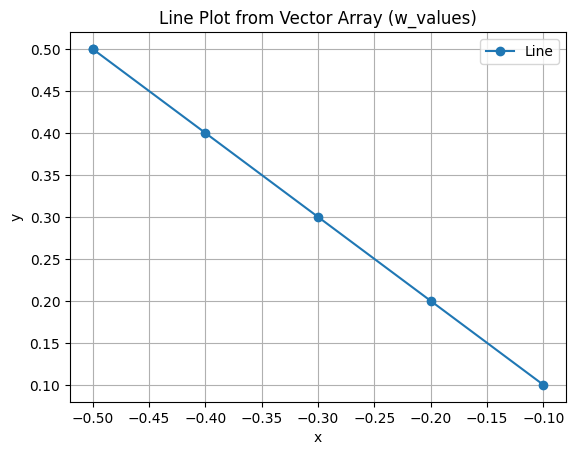

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# format (x, y), where x = (x1, x2)
trainingData = [
    ((0, 2), 1),
    ((-2, 0), 1),
    ((1, -1), -1),
]

def phi(x):
    return np.array(x)

def initial_vectors(n):
    return np.zeros(n)

def hinge_loss(w, x, y):
    margin = w.dot(phi(x)) * y
    return max(1 - margin, 0)

def logistic_loss(w, x, y):
    dot_product = w.dot(phi(x))
    return np.log(1 + np.exp(-dot_product * y))

def train_loss(w):
    return 1 / len(trainingData) * sum(logistic_loss(w, x, y) for x, y in trainingData)

# this results in a 1 x 2 matrix, [0, 0], [0.47, 1.27] ...
def gradiant_train_loss(w):
    total = 0
    for x, y in trainingData:
        if 1 - w.dot(phi(x)) * y > 0:
            total += -phi(x) * y

    return 1 / len(trainingData) * total

def gradiant_descent(F, gradiantFunc, step):
    w = initial_vectors(2)
    w_values = []
    iteration = 0  # Manual iteration counter

    while True:
        trainLoss = F(w)
        gradiant = gradiantFunc(w)
        w = w - step * gradiant
        w_values.append(w.copy())
        print(f"Loss at iteration {iteration}: w={w}, train loss={trainLoss}, gradiant train loss={gradiant}")
        iteration += 1  # Increment iteration counter
        if np.linalg.norm(gradiant) < 1e-9:  # Convergence condition
            break
        if iteration > 5000:  # Iteration limit to prevent infinite loops
            print("Iteration limit reached. Stopping.")
            break

    # Plot the line using coordinates from w_values
    w_df = pd.DataFrame(w_values, columns=["x", "y"])
    plt.plot(w_df["x"], w_df["y"], marker="o", label="Line")
    plt.title("Line Plot from Vector Array (w_values)")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

gradiant_descent(train_loss, gradiant_train_loss, 0.1)